In [5]:
import numpy as np
from util import *
from dpilqr import plot_solve
import matplotlib.pyplot as plt
import os
import util

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from dpilqr import random_setup,pos_mask


In [166]:
data_15_distributed= np.load('15_drones_distributed_sim_data.npy')
data_15_centralized = np.load('15_drones_centralized_sim_data.npy')

data_10_distributed= np.load('10_drones_distributed_sim_data.npy')
data_10_centralized = np.load('10_drones_centralized_sim_data.npy')

data_5_distributed= np.load('5_drones_distributed_sim_data.npy')
data_5_centralized = np.load('5_drones_centralized_sim_data.npy')


In [170]:
n_agents = 10
n_states = 6
x_dims = [n_states]*n_agents
x0,xf = util.paper_setup_10_quads()

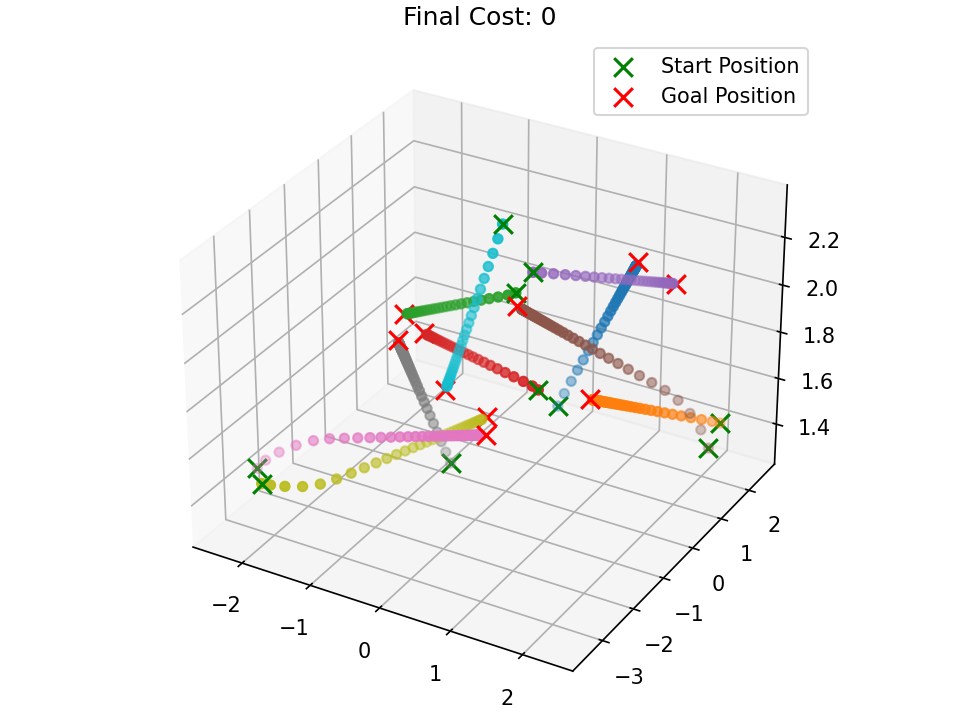

In [176]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data_10_distributed,0,xf,x_dims,n_d=3,color_agents=True)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
plt.savefig('results/Distributed MPC(IPOPT)10_drones.png');

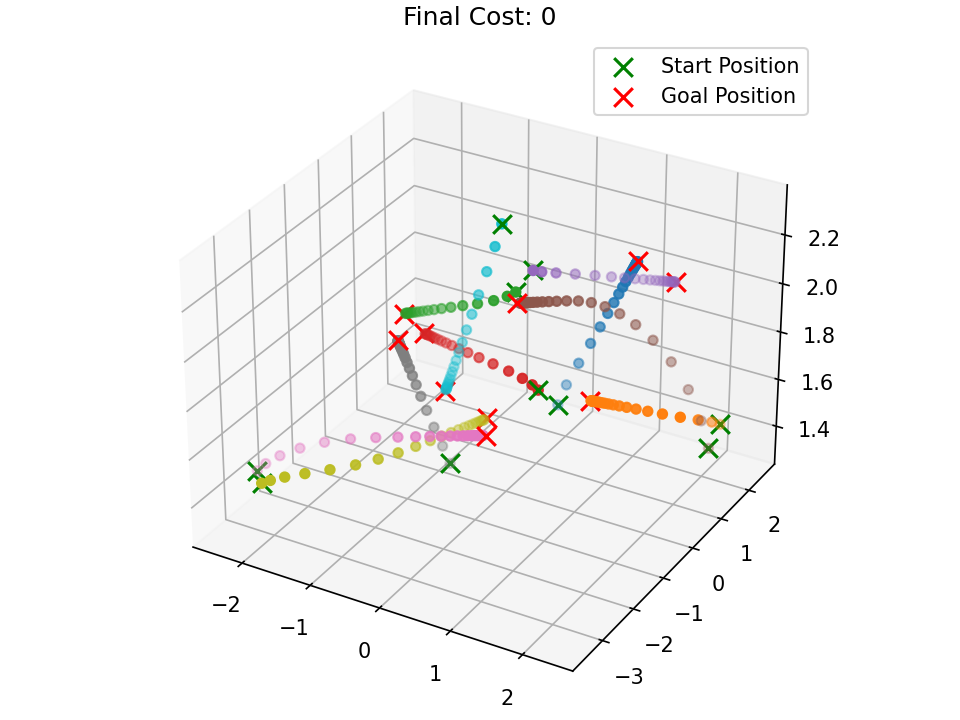

In [175]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data_10_centralized,0,xf,x_dims,n_d=3,color_agents=True)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
plt.savefig('results/Centralized MPC(IPOPT)10_drones.png');

In [179]:
n_agents = 5
n_states = 6
x_dims = [n_states]*n_agents
x0,xf = util.paper_setup_5_quads()

In [46]:
n_agents = 4
n_states = 6
x_dims = [n_states]*n_agents

In [47]:
data = np.load('4_drones_distributed_sim_data.npy')

In [48]:
unit_dist=1

In [49]:
# x0 = np.array([[-2, 0, 1, 0, 0, 0,
#             -2, 1, 1, 0, 0, 0,
#             2 ,0, 1, 0, 0, 0,
#             2, 1, 1, 0, 0, 0,
#             0.05, 1.5, 1.2, 0, 0, 0,
#             2.5, 1.5, 1.2, 0, 0, 0,
#             1.5, 0.3, 1.2, 0, 0, 0,
#             1.5, -1.5, 1.2, 0, 0, 0]], 
#             dtype=float).T
# xf = np.array([[-2+unit_dist*2, 0+unit_dist*2, 1.5, 0, 0, 0,
#             -2+unit_dist*2, 1+unit_dist*2, 1.5, 0, 0, 0,
#             2+unit_dist*2 ,0+unit_dist*2, 1.5, 0, 0, 0,
#             2+unit_dist*2, 1+unit_dist*2, 1.5, 0, 0, 0,
#             2.5, 1.5, 1.2, 0, 0, 0, 
#             -1.5, 1.5, 1.2, 0, 0, 0, 
#             1.5, 2.2, 1.2, 0, 0, 0,
#             -1.5, 1.5, 1.2, 0, 0, 0]], 
#             dtype=float).T

In [56]:
x0 = np.array([[
            2 ,0, 1, 0, 0, 0,
            2, 1, 1, 0, 0, 0,
            1.5, 1.5, 1.5, 0, 0, 0,
            2.5, 2.5, 1.5, 0, 0, 0]], 
            dtype=float).T
xf = np.array([[
            2+unit_dist*2 ,0+unit_dist*2, 1.5, 0, 0, 0,
            2+unit_dist*2, 1+unit_dist*2, 1.5, 0, 0, 0,
            3.5, 1.5, 1.5, 0, 0, 0, 
            2.5, -1.0, 1.5, 0, 0, 0]], 
            dtype=float).T

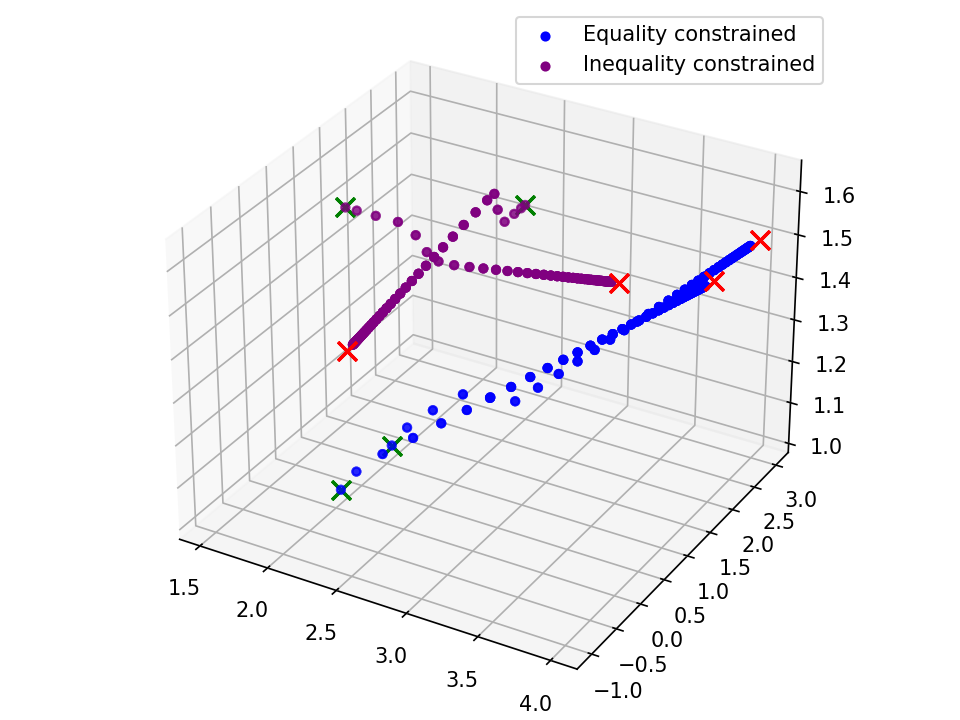

In [58]:
%matplotlib ipympl
fig = plt.figure(dpi=150)
ax = plt.gcf().add_subplot(projection="3d")
N = data.shape[0]
n = np.arange(N)

X_split = split_agents(data, x_dims)
x_goal_split = split_agents(xf.reshape(1, -1), x_dims)

for i in range(4):
    for i, (Xi, xg) in enumerate(zip(X_split[0:2], x_goal_split[0:2])):
            c = 'b'
            
            l1 = ax.scatter(Xi[:, 0], Xi[:, 1], Xi[:, 2], s=15, c=c)
            ax.scatter(
                Xi[0, 0], Xi[0, 1], Xi[0, 2], s=80, c="g", marker="x", label="$x_0$"
            )
            ax.scatter(
                xg[0, 0], xg[0, 1], xg[0, 2], s=80, c="r", marker="x", label="$x_f$"
            )
    for i, (Xi, xg) in enumerate(zip(X_split[2:], x_goal_split[2:])):
            c = 'purple'
            
            l2 = ax.scatter(Xi[:, 0], Xi[:, 1], Xi[:, 2], s=15, c=c)
            ax.scatter(
                Xi[0, 0], Xi[0, 1], Xi[0, 2], s=80, c="g", marker="x", label="$x_0$"
            )
            ax.scatter(
                xg[0, 0], xg[0, 1], xg[0, 2], s=80, c="r", marker="x", label="$x_f$"
            )
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
plt.legend((l1,l2),["Equality constrained","Inequality constrained"])

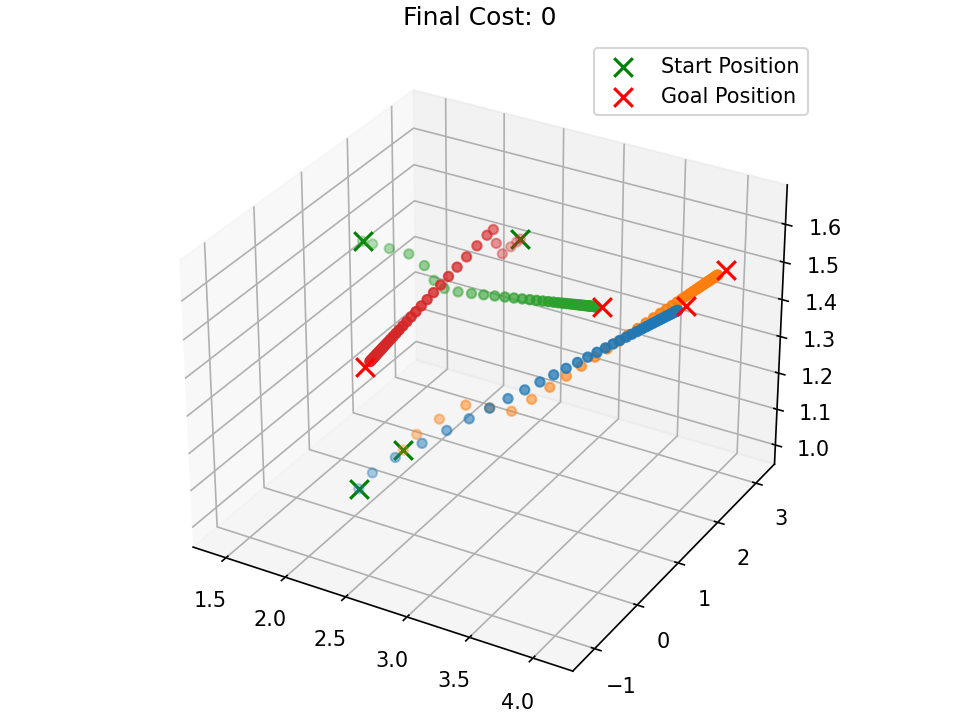

In [59]:
%matplotlib ipympl
plt.figure(dpi=150)
np.set_printoptions(precision=3)
plot_solve(data,0,xf,x_dims,n_d=3,color_agents=True)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
# plt.savefig('results/Distributed MPC (IPOPT) equal distance constraint.png');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


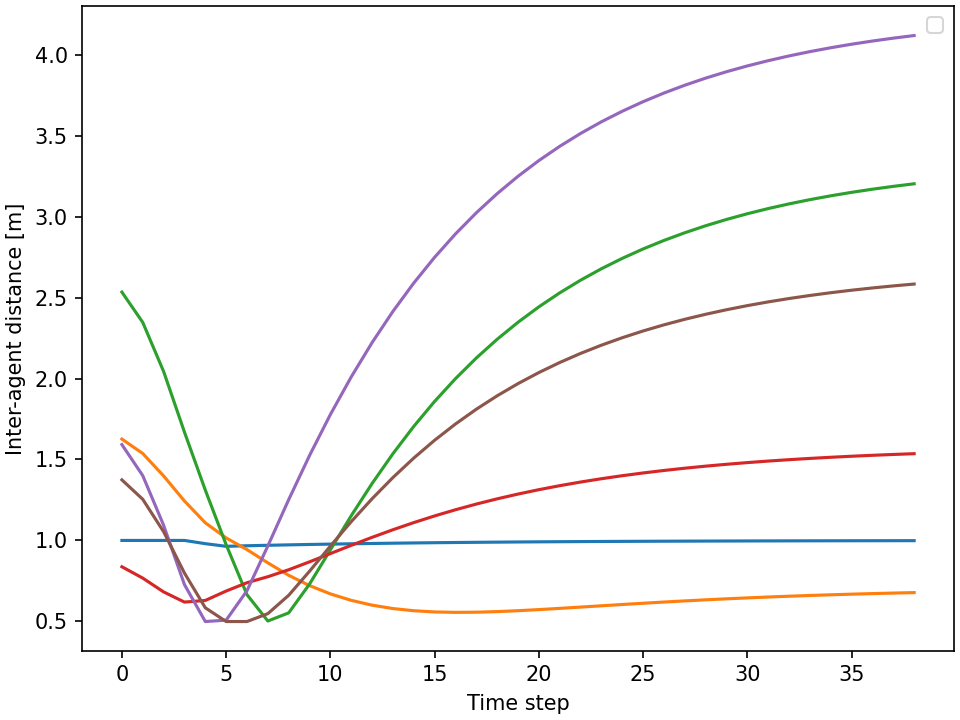

In [60]:
plt.figure(dpi=150)
plt.plot(compute_pairwise_distance(data,x_dims));
# plt.hlines(0.6, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time step")
plt.ylabel("Inter-agent distance [m]")
# plt.ylim(0.15,2.25)
np.set_printoptions(precision=0)
plt.legend(loc='upper right')
# plt.grid()
plt.savefig('results/4_drone_equal_distance_paper.png')
plt.draw()

In [ ]:
X_trj = data

In [ ]:
import matplotlib.animation as animation


# first, fill X_trj with some test data


# second, create a function that updates the scatter plot for each frame
def update_plot(k, X_trj, scatters):
     # Set the data for each scatter plot
    scatters[0]._offsets3d = X_trj.T[0:3, :k]
    scatters[1]._offsets3d = X_trj.T[6:9, :k]
    scatters[2]._offsets3d = X_trj.T[12:15, :k]
    scatters[3]._offsets3d = X_trj.T[18:21, :k]
    return scatters

# Create the figure and axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the scatter plots
scatters = []
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))

# set the axis limits
ax.set_xlim3d(X_trj.T[[0, 6, 12,18], :].min(), X_trj.T[[0, 6, 12, 18], :].max())
ax.set_ylim3d(X_trj.T[[1, 7, 13,19], :].min(), X_trj.T[[1, 7, 13, 19], :].max())
ax.set_zlim3d(X_trj.T[[2, 8, 14, 20], :].min(), X_trj.T[[2, 8, 14, 20], :].max())


# Set the title
# ax.set_title('Trajectory from one-shot optimization (human + drones)')

ani = animation.FuncAnimation(fig, update_plot, frames=500, fargs=(X_trj, scatters))

ani.save('animation(4_drones_equal_dist).gif',dpi = 150)
plt.show()

## Load results from centralized simulation:

In [ ]:
n_agents = 3
n_states = 6
x_dims = [n_states]*n_agents

In [ ]:
data = np.load('simulation_data(drones)/3_drones_centralized_sim_data.npy')

In [ ]:
data.shape

In [ ]:
x0,xf = util.paper_setup_3_quads()

In [ ]:
x0.T

In [ ]:
xf.T

In [ ]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
# plt.title('Centralized MPC (IPOPT) for 3 drones');
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);
# plt.savefig('results/Centralized MPC (IPOPT) for 3 drones.png');

In [ ]:
X_trj = data

In [ ]:
import matplotlib.animation as animation


# first, fill X_trj with some test data


# second, create a function that updates the scatter plot for each frame
def update_plot(k, X_trj, scatters):
     # Set the data for each scatter plot
    scatters[0]._offsets3d = X_trj.T[0:3, :k]
    scatters[1]._offsets3d = X_trj.T[6:9, :k]
    scatters[2]._offsets3d = X_trj.T[12:15, :k]
    return scatters

# Create the figure and axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the scatter plots
scatters = []
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))

# set the axis limits
ax.set_xlim3d(X_trj.T[[0, 6, 12], :].min(), X_trj.T[[0, 6, 12], :].max())
ax.set_ylim3d(X_trj.T[[1, 7, 13], :].min(), X_trj.T[[1, 7, 13], :].max())
ax.set_zlim3d(X_trj.T[[2, 8, 14], :].min(), X_trj.T[[2, 8, 14], :].max())


# Set the title
# ax.set_title('Trajectory from one-shot optimization (human + drones)')

ani = animation.FuncAnimation(fig, update_plot, frames=500, fargs=(X_trj, scatters))

ani.save('animation(3_drones_MPC).gif',dpi = 150)
plt.show()

In [ ]:
plt.figure(dpi=150)
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.35, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time step")
plt.ylabel("Inter-agent distance [m]")
plt.ylim(0.15,2.25)
np.set_printoptions(precision=0)
plt.legend()
# plt.grid()
# plt.savefig('results/3_drone_pairwise_distance.png')
plt.draw()

## Loading results from distributed IPOPT

In [ ]:
n_agents = 3
n_states = 6
x_dims = [n_states]*n_agents

In [ ]:
data = np.load('3_drones_distributed_sim_data.npy')

In [ ]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);
# plt.title('Distributed MPC(IPOPT) for 3 drones.png');
# plt.savefig('results/Distributed MPC (IPOPT) for 3 drones.png')

In [ ]:
X_trj = data

In [ ]:
import matplotlib.animation as animation


# first, fill X_trj with some test data


# second, create a function that updates the scatter plot for each frame
def update_plot(k, X_trj, scatters):
     # Set the data for each scatter plot
    scatters[0]._offsets3d = X_trj.T[0:3, :k]
    scatters[1]._offsets3d = X_trj.T[6:9, :k]
    scatters[2]._offsets3d = X_trj.T[12:15, :k]
    return scatters

# Create the figure and axis
fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the scatter plots
scatters = []
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))

# set the axis limits
ax.set_xlim3d(X_trj.T[[0, 6, 12], :].min(), X_trj.T[[0, 6, 12], :].max())
ax.set_ylim3d(X_trj.T[[1, 7, 13], :].min(), X_trj.T[[1, 7, 13], :].max())
ax.set_zlim3d(X_trj.T[[2, 8, 14], :].min(), X_trj.T[[2, 8, 14], :].max())


# Set the title
# ax.set_title('Trajectory from one-shot optimization (human + drones)')

ani = animation.FuncAnimation(fig, update_plot, frames=500, fargs=(X_trj, scatters))

ani.save('animation(3_drones_distributed_MPC).gif',dpi = 150)
plt.show()

In [ ]:
plt.figure(dpi=150)
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.35, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time Step")
plt.ylabel("Inter-agent distance [m]")
plt.ylim(0.25,2.25)
plt.legend()
# plt.grid()
# plt.savefig('results/3_drone_pairwise_distance(distributed).png')
plt.draw()

In [ ]:
#5 drones

In [ ]:
n_agents = 5
n_states = 6
x_dims = [n_states]*n_agents

In [ ]:
data = np.load('5_drones_centralized_sim_data.npy')

In [ ]:
x0,xf = util.paper_setup_5_quads()

In [ ]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);

In [ ]:
X_trj = data
def update_plot(k, X_trj, scatters):
     # Set the data for each scatter plot
    scatters[0]._offsets3d = X_trj.T[0:3, :k]
    scatters[1]._offsets3d = X_trj.T[6:9, :k]
    scatters[2]._offsets3d = X_trj.T[12:15, :k]
    scatters[3]._offsets3d = X_trj.T[18:21, :k]
    scatters[4]._offsets3d = X_trj.T[24:27, :k]
    return scatters

fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the scatter plots
scatters = []
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))


# set the axis limits
ax.set_xlim3d(X_trj.T[[0, 6, 12, 18, 24], :].min(), X_trj.T[[0, 6, 12, 18, 24], :].max())
ax.set_ylim3d(X_trj.T[[1, 7, 13, 19, 25], :].min(), X_trj.T[[1, 7, 13, 19, 25], :].max())
ax.set_zlim3d(X_trj.T[[2, 8, 14, 20, 26], :].min(), X_trj.T[[2, 8, 14, 20, 26], :].max())


# Set the title
# ax.set_title('Trajectory from one-shot optimization (human + drones)')

ani = animation.FuncAnimation(fig, update_plot, frames=500, fargs=(X_trj, scatters))

ani.save('animation(5_drones_MPC).gif',dpi = 150)
plt.show()

In [ ]:
data = np.load('5_drones_distributed_sim_data.npy')

In [ ]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);

In [ ]:
X_trj = data
def update_plot(k, X_trj, scatters):
     # Set the data for each scatter plot
    scatters[0]._offsets3d = X_trj.T[0:3, :k]
    scatters[1]._offsets3d = X_trj.T[6:9, :k]
    scatters[2]._offsets3d = X_trj.T[12:15, :k]
    scatters[3]._offsets3d = X_trj.T[18:21, :k]
    scatters[4]._offsets3d = X_trj.T[24:27, :k]
    return scatters

fig = plt.figure()
ax = plt.axes(projection='3d')

# Create the scatter plots
scatters = []
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))
scatters.append(ax.scatter([], [], []))


# set the axis limits
ax.set_xlim3d(X_trj.T[[0, 6, 12, 18, 24], :].min(), X_trj.T[[0, 6, 12, 18, 24], :].max())
ax.set_ylim3d(X_trj.T[[1, 7, 13, 19, 25], :].min(), X_trj.T[[1, 7, 13, 19, 25], :].max())
ax.set_zlim3d(X_trj.T[[2, 8, 14, 20, 26], :].min(), X_trj.T[[2, 8, 14, 20, 26], :].max())


# Set the title
# ax.set_title('Trajectory from one-shot optimization (human + drones)')

ani = animation.FuncAnimation(fig, update_plot, frames=500, fargs=(X_trj, scatters))

ani.save('animation(5_drones_distributed_MPC).gif',dpi = 150)
plt.show()